In [1]:
import os
import zipfile
!unzip -q "/content/drive/My Drive/archive.zip"
os.getcwd() 
os.chdir('/content/drive/My Drive')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

In [3]:
train=pd.read_csv('/content/Train.csv')
X_train=train['Path']
y_train=train.ClassId
train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [4]:
data_dir = "/content"
train_imgpath= list((data_dir + '/' + str(train.Path[i])) for i in range(len(train.Path)))

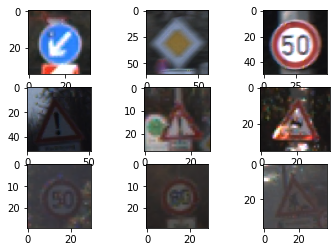

In [5]:
for i in range(0,9):
    plt.subplot(331+i)
    seed=np.random.randint(0,39210)
    im = Image.open(train_imgpath[seed])  
    plt.imshow(im)
    
plt.show()

In [6]:
train_data=[]
train_labels=[]
path = "/content/"
for i in range(len(train.Path)):
    image=cv2.imread(train_imgpath[i])
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((28,28))
    train_data.append(np.array(size_image))
    train_labels.append(train.ClassId[i])


X=np.array(train_data)
y=np.array(train_labels)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.20, random_state=7777)

In [8]:


X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255

from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout

In [10]:
def create_model(layers):
    cnn = tf.keras.models.Sequential()
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[28, 28, 3]))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
    cnn.add(tf.keras.layers.Flatten())
    
    for i, nodes in enumerate(layers):
        cnn.add(tf.keras.layers.Dense(units=nodes, activation='relu'))
            
    cnn.add(tf.keras.layers.Dense(units=43, activation='softmax'))
    
    cnn.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cnn

model = KerasClassifier(build_fn=create_model, verbose=1)
layers = [[128],(256, 128),(200, 150, 120)]
param_grid = dict(layers=layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=1)
grid_results = grid.fit(X_train,y_train, validation_data=(X_val, y_val))
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


197/197 [==============================] - 1s 3ms/step - loss: 0.0277 - accuracy: 0.7634


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.4min finished


981/981 [==============================] - 4s 4ms/step - loss: 0.0406 - accuracy: 0.6465 - val_loss: 0.0176 - val_accuracy: 0.8546
Best: 0.8757286190986633, using {'layers': (256, 128)}
0.8675041675567627 (0.008094554413543387) with: {'layers': [128]}
0.8757286190986633 (0.011715021761259811) with: {'layers': (256, 128)}
0.807248878479004 (0.03126681753501189) with: {'layers': (200, 150, 120)}


In [11]:
def create_model1():
    cnn = tf.keras.models.Sequential()
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[28, 28, 3]))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
    cnn.add(tf.keras.layers.Flatten())
    cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
    cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
    cnn.add(tf.keras.layers.Dense(units=43, activation='softmax'))
    cnn.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cnn

model = KerasClassifier(build_fn = create_model1, verbose = 1)


batch_size = [20,40]

param_grid = dict(batch_size=batch_size)


grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 1)
grid_results = grid.fit(X_train,y_train, validation_data=(X_val, y_val))


print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


157/157 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.8819


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   53.6s finished


1569/1569 [==============================] - 6s 4ms/step - loss: 0.0376 - accuracy: 0.6717 - val_loss: 0.0116 - val_accuracy: 0.9102
Best: 0.8906491279602051, using {'batch_size': 20}
0.8906491279602051 (0.013460373733735017) with: {'batch_size': 20}
0.8505116820335388 (0.01905379103991989) with: {'batch_size': 40}


In [12]:
def create_model2(dropout):
    
    cnn = tf.keras.models.Sequential()
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[28, 28, 3]))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
    cnn.add(tf.keras.layers.Flatten())
    cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
    cnn.add(Dropout(dropout))
    cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
    cnn.add(Dropout(dropout))
    cnn.add(tf.keras.layers.Dense(units=43, activation='softmax'))
    
    
    cnn.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cnn


model = KerasClassifier(build_fn = create_model2, verbose = 1,epochs=10, batch_size=20)


dropout = [0.0, 0.1, 0.2]


param_grid = dict(dropout=dropout)


grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 1)
grid_results = grid.fit(X_train,y_train, validation_data=(X_val, y_val))


print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1255/1255 [==============================] - 5s 4ms/step - loss: 0.0435 - accuracy: 0.6180 - val_loss: 0.0133 - val_accuracy: 0.8962
Epoch 2/10
1255/1255 [==============================] - 5s 4ms/step - loss: 0.0088 - accuracy: 0.9350 - val_loss: 0.0061 - val_accuracy: 0.9582
Epoch 3/10
1255/1255 [==============================] - 5s 4ms/step - loss: 0.0043 - accuracy: 0.9701 - val_loss: 0.0048 - val_accuracy: 0.9663
Epoch 4/10
1255/1255 [==============================] - 5s 4ms/step - loss: 0.0027 - accuracy: 0.9810 - val_loss: 0.0056 - val_accuracy: 0.9607
Epoch 5/10
1255/1255 [==============================] - 5s 4ms/step - loss: 0.0022 - accuracy: 0.9857 - val_loss: 0.0034 - val_accuracy: 0.9776
Epoch 6/10
1255/1255 [==============================] - 5s 4ms/step - loss: 0.0019 - accuracy: 0.9880 - val_loss: 0.0043 - val_accuracy: 0.9727
Epoch 7/10
1255/1255 [==============================] - 5s 4ms/step - loss: 0.0015 - accuracy: 0.9894 - val_loss: 0.0048 - val_accuracy: 0.9725
Epo

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 12.8min finished


1569/1569 [==============================] - 6s 4ms/step - loss: 0.0434 - accuracy: 0.6125 - val_loss: 0.0128 - val_accuracy: 0.9042
Epoch 2/10
1569/1569 [==============================] - 6s 4ms/step - loss: 0.0095 - accuracy: 0.9259 - val_loss: 0.0047 - val_accuracy: 0.9675
Epoch 3/10
1569/1569 [==============================] - 6s 4ms/step - loss: 0.0049 - accuracy: 0.9631 - val_loss: 0.0033 - val_accuracy: 0.9765
Epoch 4/10
1569/1569 [==============================] - 6s 4ms/step - loss: 0.0034 - accuracy: 0.9756 - val_loss: 0.0024 - val_accuracy: 0.9830
Epoch 5/10
1569/1569 [==============================] - 6s 4ms/step - loss: 0.0027 - accuracy: 0.9806 - val_loss: 0.0029 - val_accuracy: 0.9783
Epoch 6/10
1569/1569 [==============================] - 6s 4ms/step - loss: 0.0021 - accuracy: 0.9855 - val_loss: 0.0026 - val_accuracy: 0.9832
Epoch 7/10
1569/1569 [==============================] - 6s 4ms/step - loss: 0.0019 - accuracy: 0.9868 - val_loss: 0.0019 - val_accuracy: 0.9880
Epo

In [13]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[28, 28, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(tf.keras.layers.Dense(units=43, activation='softmax'))

# compile the model
cnn.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = cnn.fit(X_train, y_train, batch_size=20, epochs=20,validation_data=(X_val, y_val))

Epoch 1/20
1569/1569 [==============================] - 6s 4ms/step - loss: 0.0408 - accuracy: 0.6407 - val_loss: 0.0090 - val_accuracy: 0.9297
Epoch 2/20
1569/1569 [==============================] - 6s 4ms/step - loss: 0.0075 - accuracy: 0.9441 - val_loss: 0.0046 - val_accuracy: 0.9681
Epoch 3/20
1569/1569 [==============================] - 6s 4ms/step - loss: 0.0041 - accuracy: 0.9706 - val_loss: 0.0038 - val_accuracy: 0.9736
Epoch 4/20
1569/1569 [==============================] - 6s 4ms/step - loss: 0.0028 - accuracy: 0.9799 - val_loss: 0.0026 - val_accuracy: 0.9844
Epoch 5/20
1569/1569 [==============================] - 6s 4ms/step - loss: 0.0025 - accuracy: 0.9823 - val_loss: 0.0029 - val_accuracy: 0.9800
Epoch 6/20
1569/1569 [==============================] - 6s 4ms/step - loss: 0.0019 - accuracy: 0.9864 - val_loss: 0.0019 - val_accuracy: 0.9897
Epoch 7/20
1569/1569 [==============================] - 6s 4ms/step - loss: 0.0015 - accuracy: 0.9901 - val_loss: 0.0022 - val_accuracy:

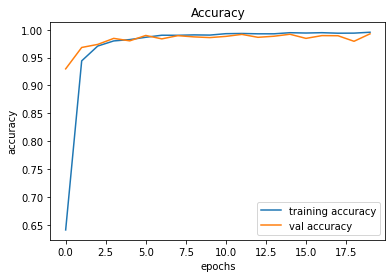

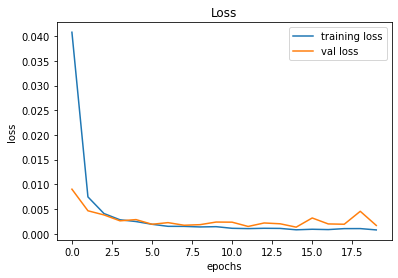

In [14]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [15]:
test=pd.read_csv('/content/Test.csv')
X_test=train['Path']
y_test=train.ClassId

In [16]:
data_dir = "/content"
test_imgpath= list((data_dir + '/' + str(test.Path[i])) for i in range(len(test.Path)))

In [17]:
test_data=[]
test_labels=[]


path = "/content/"
for i in range(len(test.Path)):
    image=cv2.imread(test_imgpath[i])
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((28,28))
    test_data.append(np.array(size_image))
    test_labels.append(test.ClassId[i])


X_test=np.array(test_data)
y_test=np.array(test_labels)

X_test = X_test.astype('float32')/255 

In [18]:
pred = cnn.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9492478226444973

In [20]:
import pickle
print("[INFO] Saving model...")
pickle.dump(model,open('cnn_model.pkl', 'wb'))

[INFO] Saving model...
